In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import Ridge

In [3]:
# Creating Data
y = np.arange(0,1000,1)
x1 = y + np.random.randn(1000)
x2 = y + np.random.randn(1000)



<AxesSubplot:>

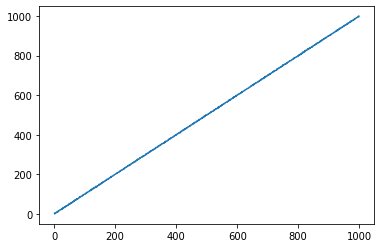

In [4]:
sns.lineplot(y = y, x = x1)

In [7]:
# First Model
regressor = Ridge()
regressor.fit(X = x1.reshape(-1,1), y = y.reshape(-1,1))

Ridge()

In [8]:
regressor.coef_

array([[1.00003843]])

In [9]:
# Correlation between x1 & x2
df = pd.DataFrame({'x1':x1,'x2':x2})
df.corr()

,x1,x2
x1,1.000000,0.999988
x2,0.999988,1.000000


In [10]:
# Not fit using both features
regressor = Ridge()
regressor.fit(X= df, y = y.reshape(-1,1))

Ridge()

In [11]:
regressor.coef_

array([[0.52416861, 0.47585897]])

In [12]:
# Whats if scale were different for these two
x3 = (100+np.random.randn(1000))*x1

In [13]:
df['x3'] = x3

In [14]:
df.corr()

,x1,x2,x3
x1,1.000000,0.999988,0.999775
x2,0.999988,1.000000,0.999763
x3,0.999775,0.999763,1.000000


In [16]:
# Not fit using both features
regressor = Ridge()
regressor.fit(X= df, y = y.reshape(-1,1))
regressor.coef_

array([[5.21794942e-01, 4.75923850e-01, 2.31058225e-05]])

In [20]:
np.sum(regressor.coef_,axis = 1)

array([0.9977419])

In [21]:
x4 = (100*np.random.randn(1000))+x1

In [22]:
df['x4'] = x4

In [23]:
df.corr()

,x1,x2,x3,x4
x1,1.000000,0.999988,0.999775,0.943054
x2,0.999988,1.000000,0.999763,0.942978
x3,0.999775,0.999763,1.000000,0.942808
x4,0.943054,0.942978,0.942808,1.000000


In [24]:
# Not fit using both features
regressor = Ridge()
regressor.fit(X= df, y = y.reshape(-1,1))
regressor.coef_

array([[ 5.22510958e-01,  4.75403083e-01,  2.29530279e-05,
        -1.79834195e-04]])

<AxesSubplot:xlabel='x4', ylabel='x1'>

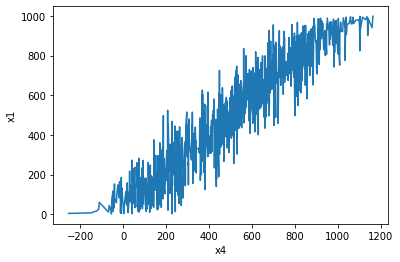

In [25]:
sns.lineplot(x = df['x4'], y = df['x1'])

In [27]:
np.sum(regressor.coef_,axis = 1)

array([0.99775716])